In [1]:
import pandas as pd
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, BatchNormalization, Activation, Dropout
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [2]:
seed_value= 10

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [3]:
labels = pd.read_csv('trainLabels.csv')

In [4]:
train_images = []
for i in labels.id:
    train_images.append(imread('train/'+str(i)+'.png'))

X_train = np.array(train_images)

In [5]:
animals = sorted(labels.label.unique())
mapping = {}
for i in range(len(animals)):
    mapping[animals[i]] = i

reversed_mapping = {v:k for k,v in mapping.items()}

In [6]:
y_train = labels.label.apply(lambda x: mapping[x])
y_cat_train = to_categorical(y_train,10)

In [7]:
(_, _), (X_test, y_test) = cifar10.load_data()
X_test = X_test/255

In [8]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), 
                 activation='relu', padding = 'same'))
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), 
                 activation='relu', padding = 'same'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), 
                 activation='relu', padding = 'same'))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), 
                 activation='relu', padding = 'same'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

## THIRD SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(32, 32, 3),
                 activation='relu', padding = 'same'))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(32, 32, 3),
                 activation='relu', padding = 'same'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# BATCH NORMALIZATION
model.add(BatchNormalization())


# FLATTENING IMAGES
model.add(Flatten())

# HIDDEN LAYER
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))

# OUTPUT LAYER
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [10]:
early_stop = EarlyStopping(monitor='val_loss',patience=20)

In [11]:
model.fit(X_train, y_cat_train, epochs=200, validation_data=(X_test, to_categorical(y_test,10)), callbacks=[early_stop])

Epoch 1/200
1563/1563 [==============================] - 223s 142ms/step - loss: 2.1393 - accuracy: 0.3064 - val_loss: 1.4741 - val_accuracy: 0.5146
Epoch 2/200
1563/1563 [==============================] - 227s 145ms/step - loss: 1.4328 - accuracy: 0.5317 - val_loss: 1.1753 - val_accuracy: 0.6340
Epoch 3/200
1563/1563 [==============================] - 228s 146ms/step - loss: 1.2476 - accuracy: 0.6120 - val_loss: 1.0373 - val_accuracy: 0.6915
Epoch 4/200
1563/1563 [==============================] - 229s 146ms/step - loss: 1.1475 - accuracy: 0.6475 - val_loss: 1.0758 - val_accuracy: 0.6794
Epoch 5/200
1563/1563 [==============================] - 228s 146ms/step - loss: 1.0792 - accuracy: 0.6781 - val_loss: 0.9933 - val_accuracy: 0.7162
Epoch 6/200
1563/1563 [==============================] - 228s 146ms/step - loss: 1.0429 - accuracy: 0.6952 - val_loss: 0.9835 - val_accuracy: 0.7184
Epoch 7/200
1563/1563 [==============================] - 229s 147ms/step - loss: 1.0026 - accuracy: 0.7085

Epoch 56/200
1563/1563 [==============================] - 215s 138ms/step - loss: 0.5804 - accuracy: 0.8632 - val_loss: 0.6672 - val_accuracy: 0.8423
Epoch 57/200
1563/1563 [==============================] - 215s 137ms/step - loss: 0.5858 - accuracy: 0.8624 - val_loss: 0.6616 - val_accuracy: 0.8463
Epoch 58/200
1563/1563 [==============================] - 215s 138ms/step - loss: 0.5724 - accuracy: 0.8637 - val_loss: 0.6709 - val_accuracy: 0.8446
Epoch 59/200
1563/1563 [==============================] - 215s 138ms/step - loss: 0.5731 - accuracy: 0.8638 - val_loss: 0.6500 - val_accuracy: 0.8477
Epoch 60/200
1563/1563 [==============================] - 226s 144ms/step - loss: 0.5751 - accuracy: 0.8651 - val_loss: 0.6948 - val_accuracy: 0.8401
Epoch 61/200
1563/1563 [==============================] - 228s 146ms/step - loss: 0.5792 - accuracy: 0.8639 - val_loss: 0.6539 - val_accuracy: 0.8499
Epoch 62/200
1563/1563 [==============================] - 228s 146ms/step - loss: 0.5779 - accuracy:

<AxesSubplot:>

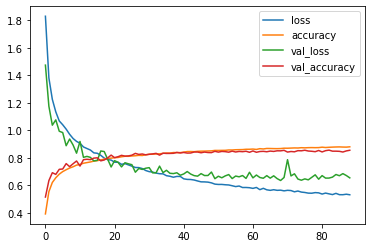

In [12]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [13]:
predictions = model.predict_classes(X_test)

C:\Users\Mateusz\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [14]:
print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1000
           1       0.91      0.94      0.93      1000
           2       0.86      0.75      0.80      1000
           3       0.75      0.71      0.73      1000
           4       0.82      0.86      0.84      1000
           5       0.80      0.77      0.79      1000
           6       0.91      0.89      0.90      1000
           7       0.86      0.91      0.88      1000
           8       0.89      0.93      0.91      1000
           9       0.88      0.91      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



array([[884,  10,  13,   8,   7,   0,   1,  10,  45,  22],
       [  8, 940,   0,   1,   0,   0,   0,   0,   7,  44],
       [ 51,   2, 747,  28,  51,  43,  36,  25,  13,   4],
       [ 13,   6,  39, 706,  52, 110,  24,  24,  12,  14],
       [  9,   2,  18,  24, 863,  13,  14,  49,   6,   2],
       [  9,   1,  27,  99,  35, 772,   7,  37,   4,   9],
       [  4,   5,  16,  42,  25,   9, 887,   4,   5,   3],
       [  9,   1,   6,  32,  20,  11,   1, 910,   1,   9],
       [ 31,  15,   7,   4,   0,   1,   1,   2, 926,  13],
       [ 17,  47,   0,   2,   1,   1,   0,   2,  17, 913]], dtype=int64)

<AxesSubplot:>

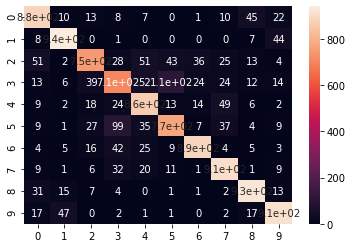

In [15]:
sns.heatmap(confusion_matrix(y_test,predictions), annot = True)

In [16]:
test_images = []
for i in range(1,300_001):
    test_images.append(imread('test/'+str(i)+'.png'))
X_test = np.array(test_images)
predictions = model.predict_classes(X_test)

In [17]:
prediction_labels = [reversed_mapping[x] for x in predictions]
predictions_df = pd.DataFrame({'id':range(1,len(prediction_labels)+1), 'label':prediction_labels})
predictions_df.to_csv("kaggle_final_new_1.csv", index = None)

In [21]:
predictions2_df = pd.DataFrame(model.predict(X_test))
predictions2_df.to_csv("kaggle_final_new_1_classes.csv", index = None)